<a href="https://colab.research.google.com/github/moonsy0311/-/blob/main/%5B%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EC%9D%84_%EC%9C%84%ED%95%9C_Numpy_%26_Pandas%5D_5%ED%9A%8C%EC%B0%A8_Pandas_%EA%B3%A0%EA%B8%89_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

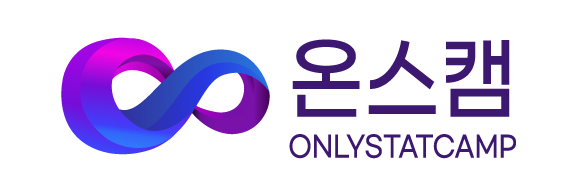

<img src="https://pandas.pydata.org/static/img/pandas.svg" height="100">

In [ ]:
# Pandas 패키지 불러오기
import pandas as pd

---

# 1.Data Science Salaries

https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

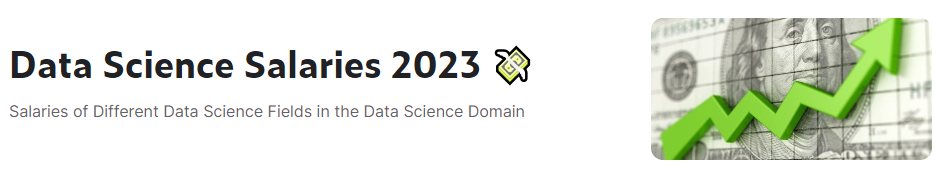

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') #''안에 있는 게 폴더명이 됨 -> content라는 폴더 안에 gdrive 라는 폴더가 삽입됨

Mounted at /content/gdrive


In [ ]:
data = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Data Science Salaries 2023 missing.xlsx의 사본") #경로복사 해서 여기에 복붙넣어두기

### 1.1. 데이터 살펴보기

In [ ]:
data.info() #데이터가 주어졌을 때 가장 먼저 info 확인하기(데이터타입,널 등등 몇 개인지)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           3755 non-null   int64  
 1   experience_level    3755 non-null   object 
 2   employment_type     3755 non-null   object 
 3   job_title           3755 non-null   object 
 4   salary              3745 non-null   float64
 5   salary_currency     3755 non-null   object 
 6   salary_in_usd       3755 non-null   int64  
 7   employee_residence  3755 non-null   object 
 8   remote_ratio        3755 non-null   int64  
 9   company_location    3755 non-null   object 
 10  company_size        3755 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 322.8+ KB


> Column 정보
* work_year: 근무 연도
* experience_level: 경험 수준 (예: SE - Senior, MI - Mid-level)
* employment_type: 고용 형태 (예: FT - Full-time, CT - Contract)
* job_title: 직책 (예: Principal Data Scientist, ML Engineer)
* salary: 해당 salary_currency로 표시된 급여
* salary_currency: 급여의 통화 단위
* salary_in_usd: USD로 환산된 급여
* employee_residence: 직원의 거주 국가
* remote_ratio: 원격 근무 비율 (백분율)
* company_location: 회사 위치
* company_size: 회사 규모 (예: S - Small, M - Medium, L - Large)

In [ ]:
data.describe() #데이터셋 확인 (info같은 개념)

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.745000e+03,3755.000000,3755.000000
mean,2022.373635,1.888795e+05,137570.389880,46.271638
std,0.691448,6.632697e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.375000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
data.head() #맨 앞 데이터 5개 확인

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000,CA,100,CA,M


In [ ]:
data.tail() #맨 뒤 데이터 5개 확인

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,NaN,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,NaN,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,NaN,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,NaN,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,NaN,INR,94665,IN,50,IN,L


## 1.2. 한글 컬럼명으로 바꾸기

In [ ]:
data.columns #list형태로 나옴

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
data.columns = [
    '근무연도',
    '경험수준',
    '고용형태',
    '직책',
    '급여',
    '급여통화',
    'USD환산급여',
    '거주국가',
    '원격근무비율',
    '회사위치',
    '회사규모'
]

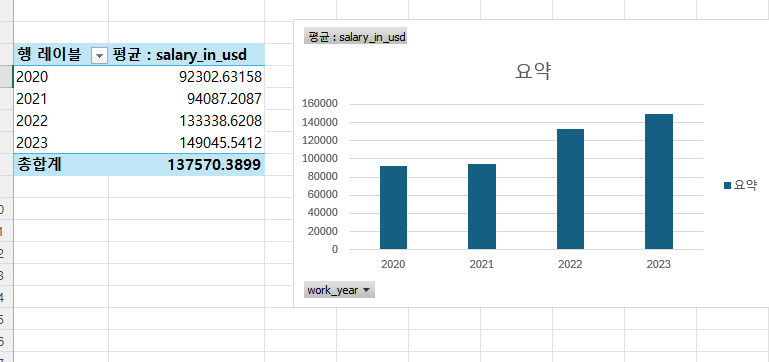

In [ ]:
data.head() #파이썬에 한글 썼을 때 오류날 가능성도 있음 (incoding문제)

,근무연도,경험수준,고용형태,직책,급여,급여통화,USD환산급여,거주국가,원격근무비율,회사위치,회사규모
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000,CA,100,CA,M


## 1.3. USD환산급여 를 KRW환산급여로 만들기

In [ ]:
# 환율 정보를 가져와서 USD를 KRW로 변환
usd_to_krw_rate = 1383.09

In [ ]:
# KRW환산급여 컬럼 추가
data['KRW환산급여'] = data['USD환산급여'] * usd_to_krw_rate

In [ ]:
data.head()

,근무연도,경험수준,고용형태,직책,급여,급여통화,USD환산급여,거주국가,원격근무비율,회사위치,회사규모,KRW환산급여
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847,ES,100,ES,L,1.187341e+08
1,2023,MI,CT,ML Engineer,30000.0,USD,30000,US,100,US,S,4.149270e+07
2,2023,MI,CT,ML Engineer,25500.0,USD,25500,US,100,US,S,3.526880e+07
3,2023,SE,FT,Data Scientist,175000.0,USD,175000,CA,100,CA,M,2.420408e+08
4,2023,SE,FT,Data Scientist,120000.0,USD,120000,CA,100,CA,M,1.659708e+08


급여를 float에서 int로 바꾸기

In [ ]:
data['KRW환산급여'] = data['KRW환산급여'].astype(int)

In [ ]:
data.head()

,근무연도,경험수준,고용형태,직책,급여,급여통화,USD환산급여,거주국가,원격근무비율,회사위치,회사규모,KRW환산급여
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847,ES,100,ES,L,118734127
1,2023,MI,CT,ML Engineer,30000.0,USD,30000,US,100,US,S,41492700
2,2023,MI,CT,ML Engineer,25500.0,USD,25500,US,100,US,S,35268795
3,2023,SE,FT,Data Scientist,175000.0,USD,175000,CA,100,CA,M,242040750
4,2023,SE,FT,Data Scientist,120000.0,USD,120000,CA,100,CA,M,165970800


In [ ]:
data['KRW환산급여_백만원'] = (data['KRW환산급여'] / 1000000).round(1)

In [ ]:
data.head()

,근무연도,경험수준,고용형태,직책,급여,급여통화,USD환산급여,거주국가,원격근무비율,회사위치,회사규모,KRW환산급여,KRW환산급여_백만원
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847,ES,100,ES,L,118734127,118.7
1,2023,MI,CT,ML Engineer,30000.0,USD,30000,US,100,US,S,41492700,41.5
2,2023,MI,CT,ML Engineer,25500.0,USD,25500,US,100,US,S,35268795,35.3
3,2023,SE,FT,Data Scientist,175000.0,USD,175000,CA,100,CA,M,242040750,242.0
4,2023,SE,FT,Data Scientist,120000.0,USD,120000,CA,100,CA,M,165970800,166.0


## 1.4. Groupby 집계 함수

*피벗테이블은 2차자료를 사용할 때만 피벗테이블이라 함(엑셀에서)

1. groupby 함수란?
    - groupby는 데이터를 특정 기준으로 그룹화하고, 각 그룹에 대해 집계 함수(예: 합계, 평균, 개수 등)를 적용하는 기능을 제공합니다. 이를 통해 대량의 데이터를 효율적으로 요약하고 분석할 수 있습니다.

2. groupby 함수의 기본 사용법
    - 단일 열을 기준으로 그룹화: 하나의 열을 기준으로 데이터를 그룹화합니다.
    - 다중 열을 기준으로 그룹화: 여러 열을 기준으로 데이터를 그룹화합니다.

3. groupby 함수의 문법
    - by: 그룹화할 열(또는 열들)
    - axis: 그룹화할 축 (0: 행, 1: 열)
    - level: 멀티인덱스의 레벨
    - as_index: 그룹화된 열을 인덱스로 설정할지 여부
    - sort: 그룹화된 결과를 정렬할지 여부
    - group_keys: 그룹 키를 포함할지 여부
```python
DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)
```



4. groupby 함수의 주요 기능
    - 집계 함수 적용: 합계, 평균, 최대값, 최소값 등 다양한 집계 함수를 그룹별로 적용할 수 있습니다.
    - 데이터 변환: 그룹별로 데이터 변환 작업을 수행할 수 있습니다.
그룹 필터링: 특정 조건에 맞는 그룹만을 선택할 수 있습니다.

### 1.4.1. 직책에 따른 평균 급여 분석

In [ ]:
# 직책별로 가장 첫번째 row 가져오기
data.groupby("직책").head(1).reset_index(drop=True) #직책별로.첫번째줄가져오기. -> 93직책있음

,근무연도,경험수준,고용형태,직책,급여,급여통화,USD환산급여,거주국가,원격근무비율,회사위치,회사규모,KRW환산급여,KRW환산급여_백만원
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847,ES,100,ES,L,118734127,118.7
1,2023,MI,CT,ML Engineer,30000.0,USD,30000,US,100,US,S,41492700,41.5
2,2023,SE,FT,Data Scientist,175000.0,USD,175000,CA,100,CA,M,242040750,242.0
3,2023,SE,FT,Applied Scientist,222200.0,USD,222200,US,0,US,L,307322598,307.3
4,2023,SE,FT,Data Analyst,130000.0,USD,130000,US,100,US,M,179801700,179.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2022,EX,FT,Head of Machine Learning,6000000.0,INR,76309,IN,50,IN,L,105542214,105.5
89,2022,MI,FT,Principal Data Analyst,75000.0,USD,75000,CA,100,CA,S,103731750,103.7
90,2021,SE,FT,Principal Data Engineer,200000.0,USD,200000,US,100,US,M,276618000,276.6
91,2021,SE,CT,Staff Data Scientist,105000.0,USD,105000,US,100,US,M,145224450,145.2


In [ ]:
average_salary_by_job = data.groupby('직책')['KRW환산급여_백만원'].mean()
average_salary_by_job = average_salary_by_job.sort_values(ascending=False)
average_salary_by_job = average_salary_by_job.reset_index()
average_salary_by_job

,직책,KRW환산급여_백만원
0,Data Science Tech Lead,518.7000
1,Cloud Data Architect,345.8000
2,Data Lead,293.9000
3,Data Analytics Lead,292.2000
4,Principal Data Scientist,274.0875
...,...,...
88,Autonomous Vehicle Technician,36.3500
89,3D Computer Vision Researcher,29.5500
90,Staff Data Analyst,20.7000
91,Product Data Scientist,11.1000


In [ ]:
average_salary_by_experience = data.groupby('경험수준')['KRW환산급여_백만원'].mean() #groupby할 때 해야하는 3가지: 기준 / mean, sum, count로 다양하게 가져올 수 있음
average_salary_by_experience = average_salary_by_experience.sort_values(ascending=False) #내림차순/오름차순
average_salary_by_experience = average_salary_by_experience.reset_index()
average_salary_by_experience

,경험수준,KRW환산급여_백만원
0,EX,269.603509
1,SE,211.680207
2,MI,144.569441
3,EN,108.640000


### 1.4.2. 경험수준에 따른 평균 급여 분석


In [ ]:
# 경험수준 컬럼을 한글로 변환한 새로운 컬럼 생성, 새롭게 한 줄 더 ㅁㄴ듦
data['경험수준_한글'] = data['경험수준'].map({
    'EX': '임원',
    'SE': '고위',
    'MI': '중간',
    'EN': '신입'
})

In [ ]:
data.head()

,근무연도,경험수준,고용형태,직책,급여,급여통화,USD환산급여,거주국가,원격근무비율,회사위치,회사규모,KRW환산급여,KRW환산급여_백만원,경험수준_한글
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847,ES,100,ES,L,118734127,118.7,고위
1,2023,MI,CT,ML Engineer,30000.0,USD,30000,US,100,US,S,41492700,41.5,중간
2,2023,MI,CT,ML Engineer,25500.0,USD,25500,US,100,US,S,35268795,35.3,중간
3,2023,SE,FT,Data Scientist,175000.0,USD,175000,CA,100,CA,M,242040750,242.0,고위
4,2023,SE,FT,Data Scientist,120000.0,USD,120000,CA,100,CA,M,165970800,166.0,고위


In [ ]:
average_salary_by_experience = data.groupby('경험수준_한글')['KRW환산급여_백만원'].mean()
average_salary_by_experience = average_salary_by_experience.sort_values(ascending=False)
average_salary_by_experience = average_salary_by_experience.reset_index()
average_salary_by_experience

,경험수준_한글,KRW환산급여_백만원
0,임원,269.603509
1,고위,211.680207
2,중간,144.569441
3,신입,108.640000


### 1.4.3. 고용형태에 따른 평균 급여 분석

In [ ]:
# 고용형태 컬럼을 한글로 변환한 새로운 컬럼 생성
data['고용형태_한글'] = data['고용형태'].map({
    'FT': '정규직',
    'PT': '파트타임',
    'CT': '계약직',
    'FL': '프리랜서'
})

In [ ]:
average_salary_by_employment_type = data.groupby('고용형태_한글')['KRW환산급여_백만원'].mean()
average_salary_by_employment_type = average_salary_by_employment_type.sort_values(ascending=False)
average_salary_by_employment_type = average_salary_by_employment_type.reset_index()
average_salary_by_employment_type

,고용형태_한글,KRW환산급여_백만원
0,정규직,191.299059
1,계약직,156.910000
2,프리랜서,71.670000
3,파트타임,54.688235


### 1.4.3. 국가별 평균 급여 분석

In [ ]:
# 데이터가 많은 국가 10개 확인
data['회사위치'].value_counts()[:10] #가장 많은 상위10국가만.

회사위치
US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
AU      14
GR      14
Name: count, dtype: int64

In [ ]:
# 회사위치 컬럼을 한글로 변환한 새로운 컬럼 생성
location_mapping = {
    'US': '미국',
    'GB': '영국',
    'CA': '캐나다',
    'ES': '스페인',
    'IN': '인도',
    'DE': '독일',
    'FR': '프랑스',
    'BR': '브라질',
    'AU': '호주',
    'GR': '그리스'
    # 필요한 다른 국가들을 추가
}
data['회사위치_한글'] = data['회사위치'].map(location_mapping)

In [ ]:
data

,근무연도,경험수준,고용형태,직책,급여,급여통화,USD환산급여,거주국가,원격근무비율,회사위치,회사규모,KRW환산급여,KRW환산급여_백만원,경험수준_한글,고용형태_한글,회사위치_한글
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847,ES,100,ES,L,118734127,118.7,고위,정규직,스페인
1,2023,MI,CT,ML Engineer,30000.0,USD,30000,US,100,US,S,41492700,41.5,중간,계약직,미국
2,2023,MI,CT,ML Engineer,25500.0,USD,25500,US,100,US,S,35268795,35.3,중간,계약직,미국
3,2023,SE,FT,Data Scientist,175000.0,USD,175000,CA,100,CA,M,242040750,242.0,고위,정규직,캐나다
4,2023,SE,FT,Data Scientist,120000.0,USD,120000,CA,100,CA,M,165970800,166.0,고위,정규직,캐나다
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,NaN,USD,412000,US,100,US,L,569833080,569.8,고위,정규직,미국
3751,2021,MI,FT,Principal Data Scientist,NaN,USD,151000,US,100,US,L,208846590,208.8,중간,정규직,미국
3752,2020,EN,FT,Data Scientist,NaN,USD,105000,US,100,US,S,145224450,145.2,신입,정규직,미국
3753,2020,EN,CT,Business Data Analyst,NaN,USD,100000,US,100,US,L,138309000,138.3,신입,계약직,미국


In [ ]:
# mapping이 안된 변수들 확인
data[data['회사위치_한글'].isna()]

,근무연도,경험수준,고용형태,직책,급여,급여통화,USD환산급여,거주국가,원격근무비율,회사위치,회사규모,KRW환산급여,KRW환산급여_백만원,경험수준_한글,고용형태_한글,회사위치_한글
39,2023,EN,FT,Data Quality Analyst,100000.0,USD,100000,NG,100,NG,L,138309000,138.3,신입,정규직,NaN
40,2023,EN,FT,Compliance Data Analyst,30000.0,USD,30000,NG,100,NG,L,41492700,41.5,신입,정규직,NaN
80,2023,MI,FT,Data Scientist,510000.0,HKD,65062,HK,0,HK,L,89986601,90.0,중간,정규직,NaN
84,2023,MI,FT,Machine Learning Engineer,90000.0,EUR,96578,NL,100,NL,L,133576066,133.6,중간,정규직,NaN
114,2022,EN,FT,Machine Learning Engineer,54000.0,CHF,56536,CH,100,CH,S,78194376,78.2,신입,정규직,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,2021,MI,FT,Data Engineer,38400.0,EUR,45391,NL,100,NL,L,62779838,62.8,중간,정규직,NaN
3744,2020,SE,FT,Machine Learning Engineer,40000.0,EUR,45618,HR,100,HR,S,63093799,63.1,고위,정규직,NaN
3745,2021,SE,FT,Director of Data Science,NaN,USD,168000,JP,0,JP,S,232359120,232.4,고위,정규직,NaN
3746,2021,MI,FT,Data Scientist,NaN,SGD,119059,SG,100,IL,M,164669312,164.7,중간,정규직,NaN


In [ ]:
average_salary_by_company_location_korean = data.groupby('회사위치_한글')['KRW환산급여_백만원'].mean()
average_salary_by_company_location_korean = average_salary_by_company_location_korean.sort_values(ascending=False)
average_salary_by_company_loca
tion_korean = average_salary_by_company_location_korean.reset_index()
average_salary_by_company_location_korean

,회사위치_한글,KRW환산급여_백만원
0,미국,209.981053
1,캐나다,182.447126
2,독일,122.114286
3,영국,120.179070
4,호주,110.685714
5,프랑스,91.476471
6,스페인,79.774026
7,그리스,71.642857
8,브라질,56.133333
9,인도,41.767241


## 1.5. Groupby aggregation  고급 집계

### 1.5.1. agg 기본 사용법

In [ ]:
# '직책' 컬럼을 이용한 groupby와 agg 함수 예시
# 직책별로 평균, 최대, 최소 급여를 계산

job_salary_stats = data.groupby('직책').agg({
    "KRW환산급여_백만원" : ["count", "min", "mean", "max"]
}).reset_index()

In [ ]:
job_salary_stats

직책 KRW환산급여_백만원                          
                                        count    min        mean    max
0   3D Computer Vision Researcher           4    7.5   29.550000   69.2
1                    AI Developer          11    8.7  189.018182  414.9
2                   AI Programmer           2   55.3   76.050000   96.8
3                    AI Scientist          16   16.6  152.312500  586.2
4              Analytics Engineer         103   10.4  210.740777  400.8
..                            ...         ...    ...         ...    ...
88              Research Engineer          37   83.0  225.600000  405.2
89             Research Scientist          82   31.8  222.974390  622.4
90         Software Data Engineer           2   69.2   86.500000  103.8
91             Staff Data Analyst           1   20.7   20.700000   20.7
92           Staff Data Scientist           1  145.2  145.200000  145.2

[93 rows x 5 columns]

In [ ]:
job_salary_stats.columns = ["직책", "데이터수", "최소급여", "평균급여", "최고급여"]
job_salary_stats

,직책,데이터수,최소급여,평균급여,최고급여
0,3D Computer Vision Researcher,4,7.5,29.550000,69.2
1,AI Developer,11,8.7,189.018182,414.9
2,AI Programmer,2,55.3,76.050000,96.8
3,AI Scientist,16,16.6,152.312500,586.2
4,Analytics Engineer,103,10.4,210.740777,400.8
...,...,...,...,...,...
88,Research Engineer,37,83.0,225.600000,405.2
89,Research Scientist,82,31.8,222.974390,622.4
90,Software Data Engineer,2,69.2,86.500000,103.8
91,Staff Data Analyst,1,20.7,20.700000,20.7


### 1.5.2. 변수명을 컬럼으로 바로 지정하기

In [ ]:
# '직책' 컬럼을 이용한 groupby와 agg 함수 예시
# 직책별로 평균, 최대, 최소 급여를 계산

job_salary_stats = data.groupby('직책').agg(
    집계수 = ('KRW환산급여_백만원', 'count'),
    평균_급여 = ('KRW환산급여_백만원', 'mean'),
    최대_급여 = ('KRW환산급여_백만원', 'max'),
    최소_급여 = ('KRW환산급여_백만원', 'min'),
    급여_표준편차 = ('KRW환산급여_백만원', 'std'),
).sort_values('평균_급여', ascending=False).reset_index()

In [ ]:
job_salary_stats

,직책,집계수,평균_급여,최대_급여,최소_급여,급여_표준편차
0,Data Science Tech Lead,1,518.7000,518.7,518.7,NaN
1,Cloud Data Architect,1,345.8000,345.8,345.8,NaN
2,Data Lead,2,293.9000,311.2,276.6,24.465895
3,Data Analytics Lead,2,292.2000,560.2,24.2,379.009235
4,Principal Data Scientist,8,274.0875,575.4,118.7,137.364078
...,...,...,...,...,...,...
88,Autonomous Vehicle Technician,2,36.3500,63.0,9.7,37.688791
89,3D Computer Vision Researcher,4,29.5500,69.2,7.5,27.747733
90,Staff Data Analyst,1,20.7000,20.7,20.7,NaN
91,Product Data Scientist,1,11.1000,11.1,11.1,NaN


### 1.5.3. agg에 lambda 함수 사용하기

In [ ]:
# '회사규모' 컬럼을 이용한 groupby와 agg 함수 예시
# lambda 함수를 통한 통계분석
company_size_remote_work_agg = data.groupby('회사규모').agg(
    집계수 = ('KRW환산급여_백만원', 'count'),
    원격근무비율 = ('원격근무비율', 'mean'),
    원격근무비율_2 = ('원격근무비율', lambda x: round(x.mean(), 1)),
).sort_values('회사규모', ascending=False).reset_index()

In [ ]:
company_size_remote_work_agg

,회사규모,집계수,원격근무비율,원격근무비율_2
0,S,148,72.297297,72.3
1,M,3153,42.990802,43.0
2,L,454,60.572687,60.6


## 1.6. 피벗 테이블

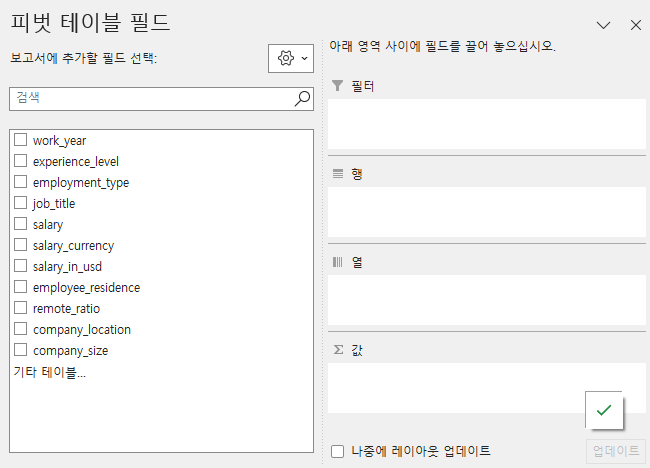

### 1.6.1. pivot_table 기본 사용법

In [ ]:
pivot_table_real = data.pivot_table(
    values='KRW환산급여_백만원',
    index='근무연도',
    columns='회사규모',
    aggfunc='mean',
    fill_value=0
)
pivot_table_real #groupby보다 짧고 깔끔?

회사규모,L,M,S
근무연도,,,
2020,139.694286,147.475000,98.148000
2021,148.216535,102.985714,113.602128
2022,167.746193,189.664119,107.957407
2023,184.475789,208.660372,108.681818


### 1.6.2. 다중 인덱스 방법



In [ ]:
pivot_table = data.pivot_table(
    values='KRW환산급여_백만원',
    index=['근무연도', '고용형태'],
    columns='회사규모',
    aggfunc='mean',
    fill_value=0
)
pivot_table

회사규모                L           M           S
근무연도 고용형태                                    
2020 CT    138.300000    0.000000    0.000000
     FL      0.000000    0.000000   83.000000
     FT    139.735294  147.475000  105.390909
     PT      0.000000    0.000000   26.050000
2021 CT    373.400000  145.200000  575.400000
     FL     27.700000   39.800000    0.000000
     FT    148.776423  110.080000  106.993182
     PT     61.450000   12.800000   28.100000
2022 CT      0.000000   59.000000   83.000000
     FL      0.000000  138.300000   55.700000
     FT    169.700000  190.079232  110.497959
     PT     41.400000  145.200000  110.450000
2023 CT      0.000000    0.000000   38.400000
     FL      0.000000   69.200000   69.200000
     FT    186.176596  208.744031  118.157895
     PT     24.600000    0.000000    0.000000

### 1.6.3. 다중 컬럼 방법

In [ ]:
pivot_table = data.pivot_table(
    values='KRW환산급여_백만원',
    index='근무연도',
    columns=['회사규모', '고용형태'],
    aggfunc='mean',
    fill_value=0
)
pivot_table

회사규모      L                               M                                S  \
고용형태     CT    FL          FT     PT     CT     FL          FT     PT     CT   
근무연도                                                                           
2020  138.3   0.0  139.735294   0.00    0.0    0.0  147.475000    0.0    0.0   
2021  373.4  27.7  148.776423  61.45  145.2   39.8  110.080000   12.8  575.4   
2022    0.0   0.0  169.700000  41.40   59.0  138.3  190.079232  145.2   83.0   
2023    0.0   0.0  186.176596  24.60    0.0   69.2  208.744031    0.0   38.4   

회사규모                            
고용형태    FL          FT      PT  
근무연도                            
2020  83.0  105.390909   26.05  
2021   0.0  106.993182   28.10  
2022  55.7  110.497959  110.45  
2023  69.2  118.157895    0.00

### 1.6.4. 다중 값 방법

In [ ]:
pivot_table = data.pivot_table(
    values=['KRW환산급여_백만원', '원격근무비율'],
    index='근무연도',
    columns='회사규모',
    aggfunc='mean',
    fill_value=0
)
pivot_table

KRW환산급여_백만원                             원격근무비율                      
회사규모           L           M           S          L          M          S
근무연도                                                                     
2020  139.694286  147.475000   98.148000  72.857143  56.250000  60.000000
2021  148.216535  102.985714  113.602128  66.929134  69.642857  72.340426
2022  167.746193  189.664119  107.957407  67.258883  52.866242  78.703704
2023  184.475789  208.660372  108.681818  33.684211  33.603118  70.454545

### 1.6.5. 다중 계산 방법

In [ ]:
pivot_table = data.pivot_table(
    values='KRW환산급여_백만원',
    index='근무연도',
    columns='회사규모',
    aggfunc=['mean', "std"],
    fill_value=0
)
pivot_table

#결과값 드래그복붙하면 엑셀에 그대로 붙여넣을 수 있음

mean                                 std                       
회사규모           L           M           S           L           M          S
근무연도                                                                       
2020  139.694286  147.475000   98.148000  116.095283  146.804403  81.334772
2021  148.216535  102.985714  113.602128   99.797527   71.115531  96.995815
2022  167.746193  189.664119  107.957407   94.414639   77.748848  82.605543
2023  184.475789  208.660372  108.681818  123.256319   81.278071  76.294377

### 1.6.6. 다중값과 다중계산의 혼합

In [ ]:
pivot_table = data.pivot_table(
    values={
        "KRW환산급여_백만원" : "std",
        "원격근무비율" : "mean",
    },
    index='근무연도',
    columns='회사규모',
    fill_value=0
)
pivot_table

KRW환산급여_백만원                             원격근무비율                      
회사규모           L           M           S          L          M          S
근무연도                                                                     
2020  139.694286  147.475000   98.148000  72.857143  56.250000  60.000000
2021  148.216535  102.985714  113.602128  66.929134  69.642857  72.340426
2022  167.746193  189.664119  107.957407  67.258883  52.866242  78.703704
2023  184.475789  208.660372  108.681818  33.684211  33.603118  70.454545

## 1.7. apply 함수

1. apply 함수란?  
    - Pandas의 apply 함수는 DataFrame의 행 또는 열에 대해 지정한 함수를 적용할 수 있는 매우 유용한 도구입니다. 이를 통해 데이터의 변환, 집계, 필터링 등을 간편하게 수행할 수 있습니다.

2. apply 함수의 기본 사용법  
    - Series에 적용: Series의 각 원소에 함수를 적용합니다.
    - DataFrame에 적용: DataFrame의 각 행 또는 열에 함수를 적용합니다.

3. apply 함수의 문법
    - func: 적용할 함수
    - axis: 적용할 축 (0: 열, 1: 행)
    - raw: 행이나 열을 Series가 아닌 ndarray로 전달할지 여부
    - result_type: 반환 결과의 유형 (‘expand’, ‘reduce’, ‘broadcast’)
```python
Series.apply(func, convert_dtype=True, args=())
DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwds)
```

4. apply 함수의 장점
    - 유연성: 사용자 정의 함수를 쉽게 적용할 수 있습니다.
    - 가독성: 코드가 간결하고 직관적입니다.
    - 강력한 기능: 복잡한 데이터 변환 작업을 효율적으로 수행할 수 있습니다.

### 1.7.1. apply를 사용한 컬럼 추가

기존 코드

In [ ]:
# 환율 정보를 가져와서 USD를 KRW로 변환
usd_to_krw_rate = 1383.09
# KRW환산급여 컬럼 추가
data['KRW환산급여'] = data['USD환산급여'] * usd_to_krw_rate #속도가 제일 빠름

apply 적용

In [ ]:
data['KRW환산급여'] = data.apply(lambda x: x["USD환산급여"] * 1383.09, axis=1) # 데이터프레임에 apply를 할 때는 axis=1을 설정해야 한다.

In [ ]:
data['KRW환산급여'] = data['USD환산급여'].apply(lambda x: x * 1383.09) #row 하나씩 끌어와서 계산하고 다시 넣어줌

### 1.7.2. 복잡한 함수 적용 예제

In [ ]:
100_000 #숫자에 언더바있어도 상관없음

100000

In [ ]:
format(1000000000,',') #천단위마다 쉼표 찍어줌

'1,000,000,000'

In [ ]:
# KRW 환산 급여를 백만원 단위로 텍스트 변환하는 함수 정의
def convert_to_text(krw):
    million_krw = krw / 1_000_000
    return f"{million_krw:.0f}백만원"

In [ ]:
convert_to_text(123456789)

'123백만원'

In [ ]:
data['KRW환산급여_텍스트'] = data['KRW환산급여'].apply(convert_to_text)

In [ ]:
data.head()

## 1.8. rolling 함수

1. rolling 함수란?
    - rolling 함수는 시계열 데이터나 연속된 데이터에서 이동 평균, 이동 합계 등과 같은 롤링(window) 연산을 수행할 수 있게 합니다. 이는 주로 시간에 따른 데이터의 변화를 분석할 때 사용됩니다.

2. rolling 함수의 기본 사용법
    - window: 롤링 윈도우의 크기를 지정합니다.
    - min_periods: 윈도우 내에 계산을 위해 필요한 최소 관측치 수를 지정합니다.
    - center: 윈도우가 중심을 기준으로 할지, 아니면 끝을 기준으로 할지 지정합니다.

3. rolling 함수의 문법
    - window: 윈도우 크기 (필수)
    - min_periods: 계산을 위한 최소 관측치 수 (기본값은 window 크기)
    - center: 중심을 기준으로 할지 여부 (기본값은 False)
    - win_type: 롤링 윈도우의 가중치 타입 (optional)
    - on: 롤링을 수행할 열 (optional)
    - axis: 롤링을 수행할 축 (기본값은 0)
    - closed: 윈도우의 닫힘 여부 (optional)

```python
DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)
```

4. rolling 함수의 주요 기능
    - 이동 평균 (Moving Average): 데이터의 일정 구간 동안의 평균을 계산합니다.
    - 이동 합계 (Moving Sum): 데이터의 일정 구간 동안의 합계를 계산합니다.
    - 이동 최대값/최소값 (Moving Max/Min): 데이터의 일정 구간 동안의 최대값이나 최소값을 계산합니다.


### 1.8.1. 이동평균 구하기

In [ ]:
# 연도별 평균 USD환산급여 계산
yearly_avg_usd_salary = data.groupby('근무연도')['USD환산급여'].mean().reset_index()
yearly_avg_usd_salary

,근무연도,USD환산급여
0,2020,92302.631579
1,2021,94087.208696
2,2022,133338.620793
3,2023,149045.541176


In [ ]:
# 2년 이동 평균 계산 (끝?)/
yearly_avg_usd_salary['2년_이동평균'] = yearly_avg_usd_salary['USD환산급여'].rolling(window=2, min_periods=1).mean()
yearly_avg_usd_salary

,근무연도,USD환산급여,2년_이동평균
0,2020,92302.631579,92302.631579
1,2021,94087.208696,93194.920137
2,2022,133338.620793,113712.914744
3,2023,149045.541176,141192.080985


In [ ]:
# 3년 이동 평균 계산 (center)
yearly_avg_usd_salary['3년_이동평균'] = yearly_avg_usd_salary['USD환산급여'].rolling(window=3, min_periods=1).mean()
yearly_avg_usd_salary

,근무연도,USD환산급여,2년_이동평균,3년_이동평균
0,2020,92302.631579,92302.631579,92302.631579
1,2021,94087.208696,93194.920137,93194.920137
2,2022,133338.620793,113712.914744,106576.153689
3,2023,149045.541176,141192.080985,125490.456888


In [ ]:
# 3년 이동 평균 계산 (center)
yearly_avg_usd_salary['3년_이동평균_center'] = yearly_avg_usd_salary['USD환산급여'].rolling(window=3, min_periods=1, center=True).mean()
yearly_avg_usd_salary

,근무연도,USD환산급여,2년_이동평균,3년_이동평균,3년_이동평균_center
0,2020,92302.631579,92302.631579,92302.631579,93194.920137
1,2021,94087.208696,93194.920137,93194.920137,106576.153689
2,2022,133338.620793,113712.914744,106576.153689,125490.456888
3,2023,149045.541176,141192.080985,125490.456888,141192.080985


### 1.8.2. groupby와 rolling함수 동시에 사용하기

In [ ]:
data["USD환산급여_3년_이동평균"] = data.groupby(["경험수준", "고용형태"])['USD환산급여'].rolling(window=3, min_periods=1).mean().values

In [ ]:
data.head()

---